In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from incremental_hyser.hyser import hyser as hy

In [17]:
results = pickle.load(open('./results/prova.pkl', 'rb'))['results']

mae_dict = {
    'stage': {
        0: {'onedof': {'day': {}}, 'ndof': {'day': {}}, 'random': {'day': {}}},
        1: {'onedof': {'day': {}}, 'ndof': {'day': {}}, 'random': {'day': {}}},
        2: {'onedof': {'day': {}}, 'ndof': {'day': {}}, 'random': {'day': {}}},
    }
}

for idx_stage in [0, 1, 2]:
    for idx_day in range(hy.NUM_SESSIONS):
        mae_dict['stage'][idx_stage]['onedof']['day'][idx_day] = np.zeros((hy.NUM_SUBJECTS, hy.NUM_FINGERS, hy.NUM_TRIALS_ONEDOF, hy.NUM_FINGERS), dtype=np.float32)
        mae_dict['stage'][idx_stage]['ndof']['day'][idx_day] = np.zeros((hy.NUM_SUBJECTS, hy.NUM_COMBINATIONS_NDOF, hy.NUM_TRIALS_NDOF, hy.NUM_FINGERS), dtype=np.float32)
        mae_dict['stage'][idx_stage]['random']['day'][idx_day] = np.zeros((hy.NUM_SUBJECTS, hy.NUM_TRIALS_RANDOM, hy.NUM_FINGERS), dtype=np.float32)

        for idx_subj in range(hy.NUM_SUBJECTS):

            # onedof
            # for idx_finger in range(hy.NUM_FINGERS):
            #    for idx_trial in range(hy.NUM_TRIALS_ONEDOF):
            #        mae_dict['stage'][idx_stage]['onedof']['day'][idx_day][idx_subj, idx_finger, idx_trial] = \
            #            results['subject'][idx_subj]['stage'][idx_stage]['onedof']['day'][idx_day]['finger'][idx_finger]['trial'][idx_trial]['mae']

            # ndof
            for idx_comb in range(hy.NUM_COMBINATIONS_NDOF):
                for idx_trial in range(hy.NUM_TRIALS_NDOF):
                    mae_dict['stage'][idx_stage]['ndof']['day'][idx_day][idx_subj, idx_comb, idx_trial] = \
                        results['subject'][idx_subj]['stage'][idx_stage]['onedof']['day'][idx_day]['combination'][idx_comb]['trial'][idx_trial]['mae']
                        # results['subject'][idx_subj]['stage'][idx_stage]['ndof']['day'][idx_day]['combination'][idx_comb]['trial'][idx_trial]['mae']

            # random
            for idx_trial in range(hy.NUM_TRIALS_RANDOM):
                mae_dict['stage'][idx_stage]['random']['day'][idx_day][idx_subj, idx_trial] = \
                    results['subject'][idx_subj]['stage'][idx_stage]['random']['day'][idx_day]['trial'][idx_trial]['mae']

ValueError: Dimensions of labels and X must be compatible

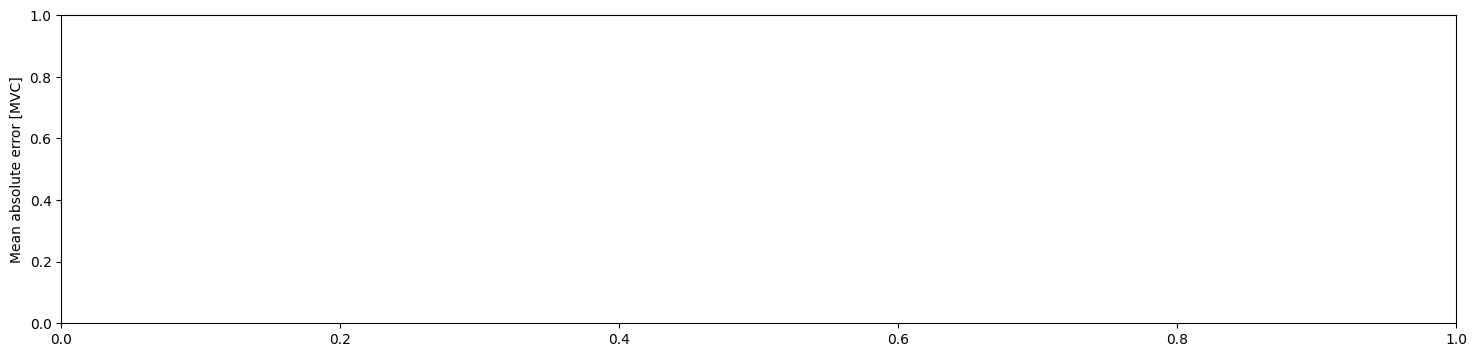

In [19]:
labels = [
    "Stage 0",
    "Stage 1",
    "Stage 2",
]
color_dict = {
    "Stage 0": (1.00, 1.00, 1.00),
    "Stage 1": (0.67, 0.67, 0.67),
    "Stage 2": (0.33, 0.33, 0.33),
}
medianprops = {'color': 'black'}


fig, ax = plt.subplots(1, 1, figsize=(18.0, 4.0))

ax.set_ylabel("Mean absolute error [MVC]")

data = [
    # stage 0
    # mae_dict['stage'][0]['onedof']['day'][0].flatten(),
    # mae_dict['stage'][0]['onedof']['day'][1].flatten(),
    mae_dict['stage'][0]['ndof']['day'][0].flatten(),
    mae_dict['stage'][0]['ndof']['day'][1].flatten(),
    mae_dict['stage'][0]['ndof']['day'][0].flatten(),
    mae_dict['stage'][0]['ndof']['day'][1].flatten(),
    mae_dict['stage'][0]['random']['day'][0].flatten(),
    mae_dict['stage'][0]['random']['day'][1].flatten(),
    # stage 1
    mae_dict['stage'][1]['ndof']['day'][0].flatten(),
    mae_dict['stage'][1]['ndof']['day'][1].flatten(),
    mae_dict['stage'][1]['random']['day'][0].flatten(),
    mae_dict['stage'][1]['random']['day'][1].flatten(),
    # stage 2
    mae_dict['stage'][2]['random']['day'][0].flatten(),
    mae_dict['stage'][2]['random']['day'][1].flatten(),
]
positions = [
    1.0, 2.0,
    4.0 - 0.5, 4.0 + 0.5, 5.0 - 0.5, 5.0 + 0.5,
    7.0 + 1.0, 7.0, 7.0 + 1.0, 8.0 - 1.0, 8.0, 8.0 + 1.0,
]

bp1_dict = ax.boxplot(
    x=data,
    positions=positions,
    labels=labels * 3,
    widths=0.75,
    medianprops=medianprops,
    patch_artist=True,
)

# COLORS?
# idx_lbl = 0
# for b in bp1_dict['boxes']:
#    lbl = ax.get_xticklabels()[idx_lbl].get_text()
#    b.set_facecolor(color_dict[lbl])
#    if idx_lbl < 4:
#        b.set_label(lbl)
#    idx_lbl += 1

ax.legend(loc='best')
ax.grid(axis='y')
ax.set_xlim([0.0, 10.0])
ax.set_ylim([0.0, None])

ax.set_xticks([2.5, 4.5, 7.5])
ax.set_xticklabels(["1-DoF", "5-DoF", "Random"], weight='bold')
# https://stackoverflow.com/questions/20532614/multiple-lines-of-x-tick-labels
# ax.set_xticks([1.0, 2.0, 4.0, 5.0, 7.0, 8.0])
# ax.set_xticklabels(["Day 1", "Day 2", "Day 1", "Day 2", "Day 1", "Day 2"], weight='bold')

ax.tick_params(axis='x', which='both', bottom=False)

plt.tight_layout()
plt.savefig("./plot_mae_stages.pdf", dpi=600, bbox_inches='tight')
plt.show()